In [1]:
import pandas as pd
import numpy as np

red_wine = pd.read_csv('../data/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('../data/winequality-white.csv', sep = ';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis =1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 13)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver = 'liblinear', random_state= 13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print('train acc :' ,accuracy_score(y_train, y_pred_tr))
print('test acc :' ,accuracy_score(y_test, y_pred_test))


train acc : 0.7425437752549547
test acc : 0.7438461538461538


In [4]:
from matplotlib.pyplot import cla
from sklearn.metrics import classification_report
## 머신모델 결과에 대한 4가지 정보를 알려줌 

print(classification_report(y_test, lr.predict(X_test)))


              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]])

In [6]:
## precision_recall curve

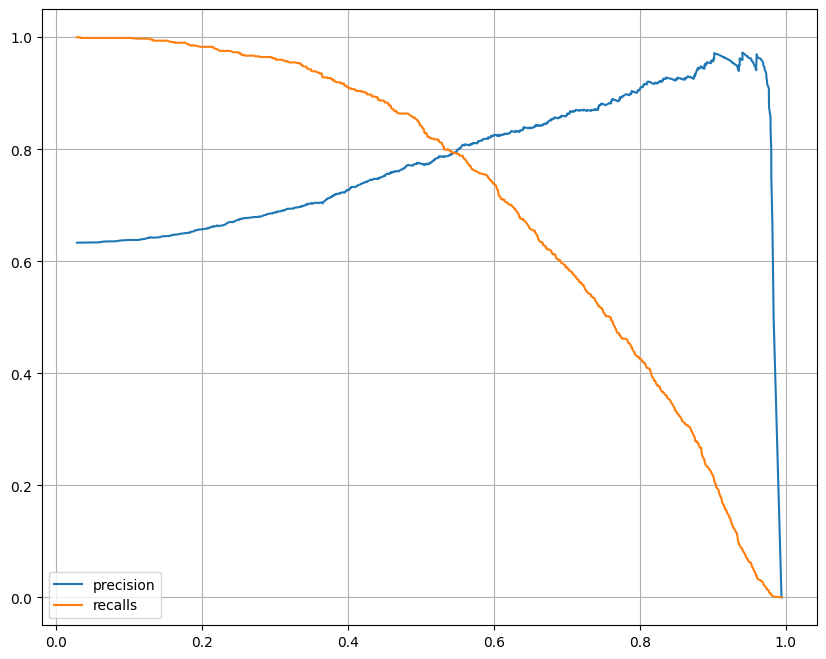

In [9]:
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve
%matplotlib inline

plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls , thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds , precisions[:len(thresholds)] , label= 'precision')
plt.plot(thresholds , recalls[:len(thresholds)] , label= 'recalls')
plt.grid(); plt.legend(); plt.show()

In [10]:
from sklearn.preprocessing import Binarizer
pred_proba = lr.predict_proba(X_test)

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [11]:
confusion_matrix(y_test, pred_bin)

array([[348, 129],
       [216, 607]])